In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CKA

In [2]:
file_path = Path('cka_wav2vec2_bert-base-uncased.json')

with file_path.open('r', encoding='utf-8') as file:
    bert_w2v = json.load(file)

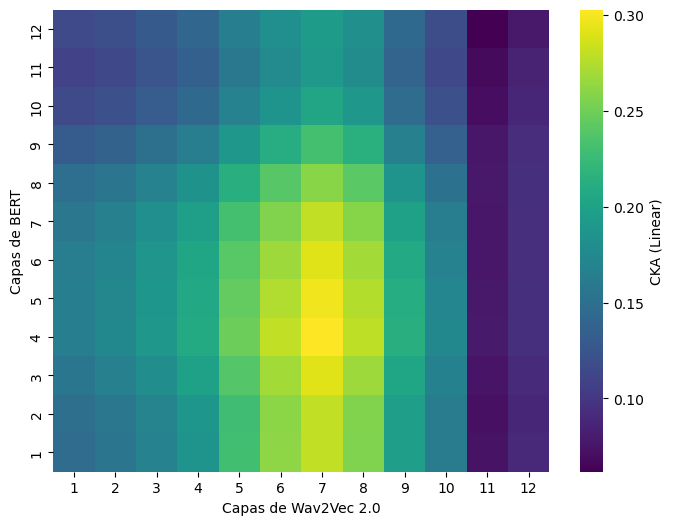

In [3]:
plt.figure(figsize=(8, 6))
sns.heatmap(bert_w2v, fmt=".1f", cmap='viridis', cbar_kws={'label': 'CKA (Linear)'})
plt.xlabel(f"Capas de Wav2Vec 2.0")
plt.ylabel(f"Capas de BERT")
plt.ylim(0, len(bert_w2v))
plt.xticks(ticks=[i + 0.5 for i in range(len(bert_w2v))], labels=range(1, len(bert_w2v) + 1))
plt.yticks(ticks=[i + 0.5 for i in range(len(bert_w2v))], labels=range(1, len(bert_w2v) + 1))
plt.show()

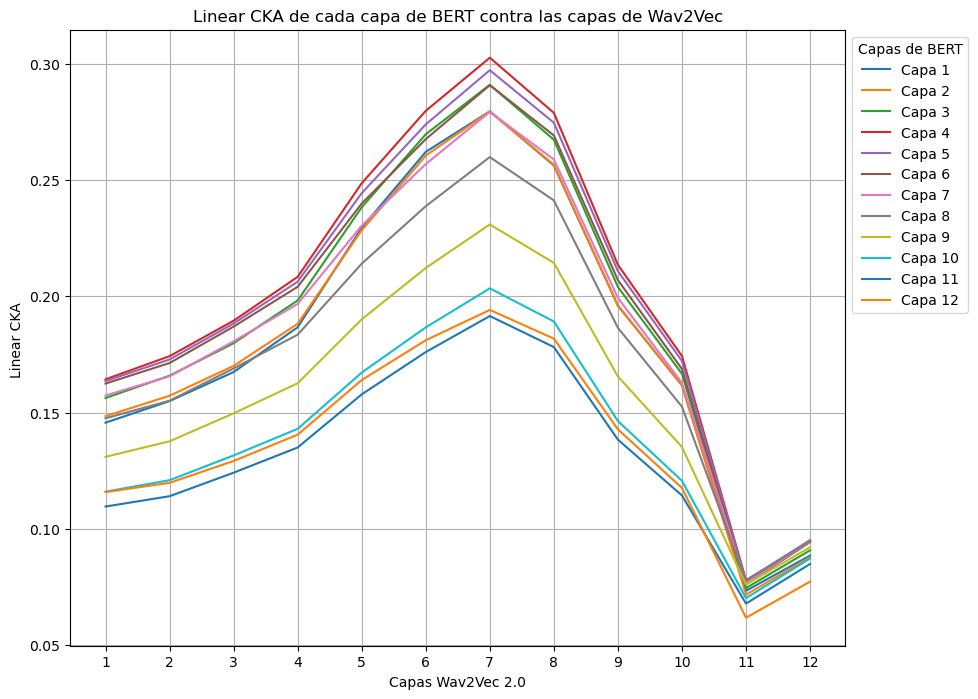

In [4]:
plt.figure(figsize=(10, 8))

x = range(1, 12 + 1) 
for i, row in enumerate(bert_w2v):
    plt.plot(x, row, label=f'Capa {i + 1}')  # Plot each row with a label

plt.xlabel("Capas Wav2Vec 2.0")
plt.ylabel("Linear CKA ")
plt.title("Linear CKA de cada capa de BERT contra las capas de Wav2Vec")
plt.legend(title="Capas de BERT", loc='upper left', bbox_to_anchor=(1,1))  # Add a legend with a title
plt.grid(True)  # Optionally add a grid for better readability
plt.xticks(range(1,13))
plt.show()

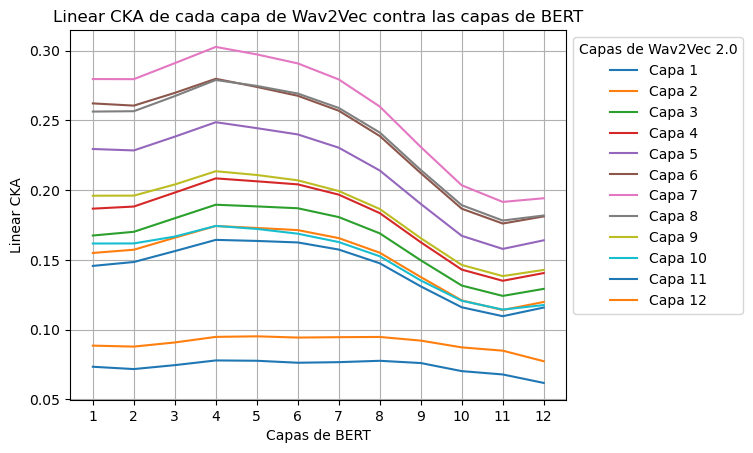

In [5]:
cka_similarity_array = np.array(bert_w2v)
for j in range(12):  # args.layer2 is the number of layers in Wav2Vec 2.0
    plt.plot(x, cka_similarity_array[:, j], label=f'Capa {j + 1}')

plt.xlabel("Capas de BERT")
plt.ylabel("Linear CKA")
plt.title("Linear CKA de cada capa de Wav2Vec contra las capas de BERT")
plt.legend(title="Capas de Wav2Vec 2.0", loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.xticks(range(1, 12 + 1))
plt.show()

# ASIF

In [11]:
def get_accuracy_top1(j=6, h=0, p=4, k=100):
    asif_value = 0
    with open(f'retrieval_wav2vec2_layer{j}_bert-base-uncased_layer{h}_p{p}_k{k}.json', 'r') as f:
        retrieval = json.load(f)
    words = []
    count_top1 = 0 
    keys_test = [retrieval['all_values'][i] for i in retrieval['rows_deleted']]
    total = len(keys_test)
    for i in range(total):
        word = keys_test[i]
        k_1 = retrieval['retrieval_indices'][i][0]
        if word == retrieval['keys_anchors'][k_1]:
            count_top1 += 1
    asif_value = count_top1 / total
    return asif_value, words 

In [12]:
asif_similarity = np.zeros((12, 12))
for i_1 in range(12):
    for j_1 in range(12):
        asif_similarity[j_1, i_1] = get_accuracy_top1(j=i_1,h=j_1)[0]

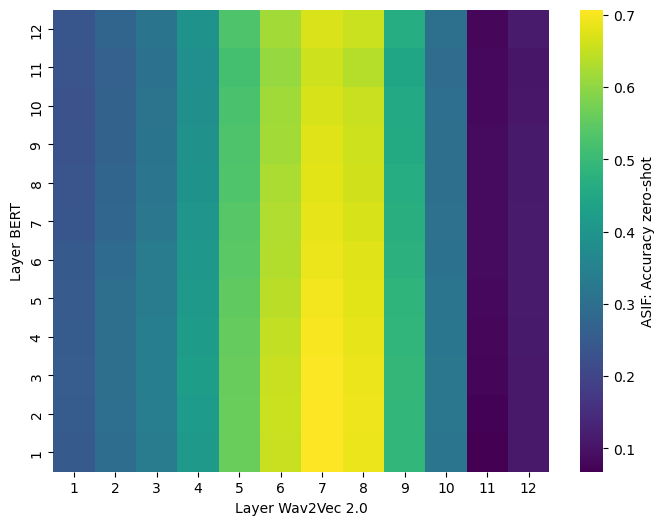

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(asif_similarity, fmt=".1f", cmap='viridis', cbar_kws={'label': 'ASIF: Accuracy zero-shot'})
plt.xlabel(f"Layer Wav2Vec 2.0")
plt.ylabel(f"Layer BERT")
plt.ylim(0, len(asif_similarity))
plt.xticks(ticks=[i + 0.5 for i in range(12)], labels=range(1, 12 + 1))
plt.yticks(ticks=[i + 0.5 for i in range(12)], labels=range(1, 12 + 1))
plt.show()


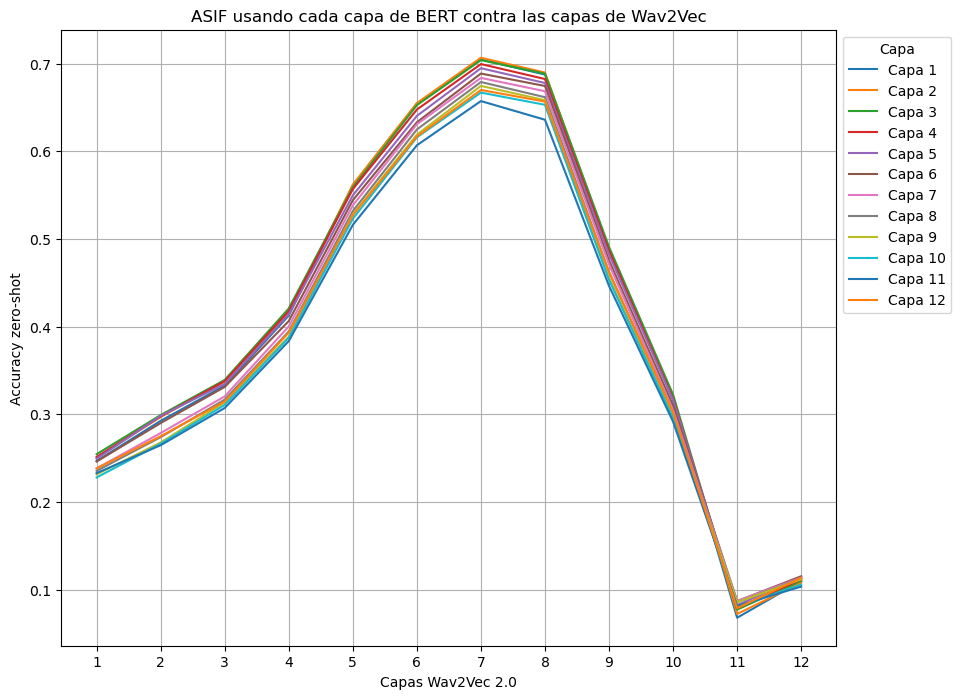

In [14]:
plt.figure(figsize=(10, 8))

x = range(1, 12 + 1) 
for i, row in enumerate(asif_similarity):
    plt.plot(x, row, label=f'Capa {i + 1}')  # Plot each row with a label

plt.xlabel("Capas Wav2Vec 2.0")
plt.ylabel("Accuracy zero-shot")
plt.title("ASIF usando cada capa de BERT contra las capas de Wav2Vec")
plt.legend(title="Capa", loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)  # Optionally add a grid for better readability
plt.xticks(range(1,13))
plt.show()

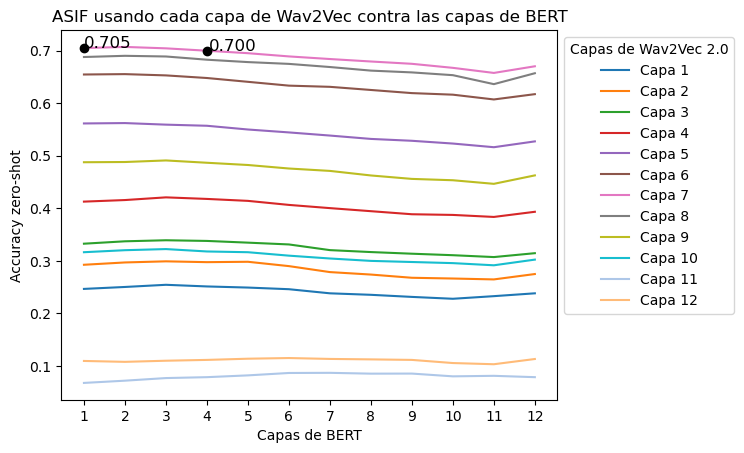

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define a color palette with 12 distinct colors
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf',  # blue-teal
    '#aec7e8',  # light blue
    '#ffbb78'   # light orange
]

# Assuming asif_similarity is your similarity matrix and is already loaded
x = range(1, 13)  # Representing the 12 layers of BERT

for j in range(12):  # args.layer2 is the number of layers in Wav2Vec 2.0
    plt.plot(x, asif_similarity[:, j], label=f'Capa {j + 1}', color=colors[j])

plt.plot(1, asif_similarity[0, 6], 'o', color='black', markersize=6)
plt.text(1, asif_similarity[0, 6], f'{asif_similarity[0, 6]:.3f}', fontsize=12, color='black')
plt.plot(4, asif_similarity[3, 6], 'o', color='black', markersize=6)
plt.text(3 + 1.05,  asif_similarity[3, 6], f'{asif_similarity[3, 6]:.3f}', fontsize=12, color='black')

plt.xlabel("Capas de BERT")
plt.ylabel("Accuracy zero-shot")
plt.title("ASIF usando cada capa de Wav2Vec contra las capas de BERT")
plt.xticks(range(1, 13))

# Moving the legend outside the plot on the right side
plt.legend(title="Capas de Wav2Vec 2.0", loc='upper left', bbox_to_anchor=(1,1))

plt.show()
